In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn_dataset.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df=df.drop("customerID",axis=1)
df.drop_duplicates(inplace=True)

In [5]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
a=df.select_dtypes(include="object").columns
b=df.select_dtypes(include=["int","float"]).columns

In [7]:
b

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [8]:
out=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

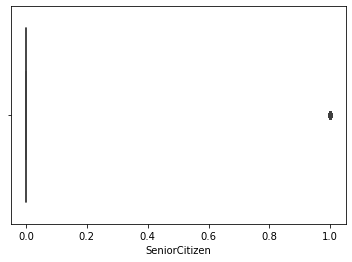

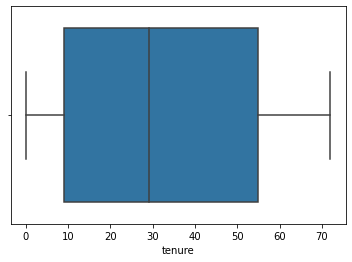

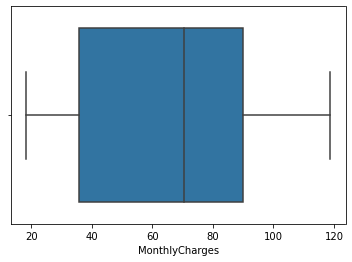

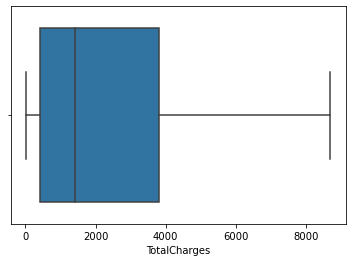

In [9]:
for i in out:
    sns.boxplot(df[i])
    plt.show()

# Imputing Null values with mean

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
for i in out:
    print("mean of {}".format(i),":",df[i].mean())
    print("median of {}".format(i),":",df[i].median())

mean of SeniorCitizen : 0.1625124626121635
median of SeniorCitizen : 0.0
mean of tenure : 32.46944879646774
median of tenure : 29.0
mean of MonthlyCharges : 64.8518943170489
median of MonthlyCharges : 70.4
mean of TotalCharges : 2290.353388017122
median of TotalCharges : 1403.875


In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


# Step:1- Defining the input(X) and output(y) variables

In [15]:
X=df[[ 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y=df['Churn']

# Step:2 - Splitting the data into train and test 

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Step:3 - Segregation of numericals and categorical columns and rescaling then using Standard Scaler ,Label Encoder and OneHotEncoding Transformation Techniques 

In [17]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include="object")
X_test_cat=X_test.select_dtypes(include="object")


# Step:3(i) -  Transformation of X_train_num & X_test_num using Standard Scaler 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_trans=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_num_trans=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

# Step : 3(ii) - Transformation of X_train_cat & X_test_cat using OneHotEncoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse=False)
X_train_cat_trans=pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names_out(X_train_cat.columns),index=X_train_cat.index)
X_test_cat_trans=pd.DataFrame(encoder.transform(X_test_cat),
                               columns=encoder.get_feature_names_out(X_test_cat.columns),index=X_test_cat.index)
X_train_cat_trans

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5905,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4389,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1988,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3194,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3675,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5210,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5246,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5410,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


# Step :3(iii) - Concating the X_train_num_trans & X_test_num_trans also X_train_cat_trans & X_test_cat_trans

In [20]:
X_train_conc=pd.concat([X_train_num_trans,X_train_cat_trans],axis=1)
X_test_conc=pd.concat([X_test_num_trans,X_test_cat_trans],axis=1)

# Step 4,5&6- Model Building,Prediction & Evaluation

# LogisticRegression

In [21]:
# model building
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)

Algorithm=[]
Accuracy_score=[]
Precision_score=[]
Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.8208784940102681


# KNeighborsClassifier

In [22]:
# model building
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)



Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.7569880205362236


# Support Vector Classifier

In [23]:
# model building
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("Support Vector Classifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.8220193953223046


# DecisionTreeClassifier

In [24]:
# model building
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.739874500855676


# GaussianNB

In [25]:
# model building
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("GaussianNB")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.6560182544209926


# AdaBoostClassifier

In [26]:
# model building
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.8157444381061039


# GradientBoostingClassifier

In [27]:
# model building
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.8128921848260126


# RandomForestClassifier

In [28]:
# model building
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)


Algorithm.append("RandomForestClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label="No"))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label="No"))


print(a)

0.7917855105533371


In [29]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,"Precision_score":Precision_score,
                      "F1_score":F1_score},index=Algorithm)

In [30]:
overview

,Accuracy_score,Precision_score,F1_score
LogisticRegression,0.820878,0.862419,0.883531
KNeighborsClassifier,0.756988,0.840092,0.837529
Support Vector Classifier,0.822019,0.849477,0.886545
DecisionTreeClassifier,0.739875,0.838990,0.823393
GaussianNB,0.656018,0.947236,0.714353
AdaBoostClassifier,0.815744,0.858382,0.880326
GradientBoostingClassifier,0.812892,0.856318,0.878519
RandomForestClassifier,0.791786,0.841236,0.865164


# Conclusion
- From the above data we say that  <font size="4"> __SupportVectorClassifier__ </font> is the best fit model as accuracy of prediction  is more in  evaluation matrix
- <font size="4"> __GaussianNB__ </font> perfomance is low compare with others

In [31]:
df.to_csv("df2.csv")

# Univariate Analysis

In [32]:
df.select_dtypes(include=["int","float"]).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

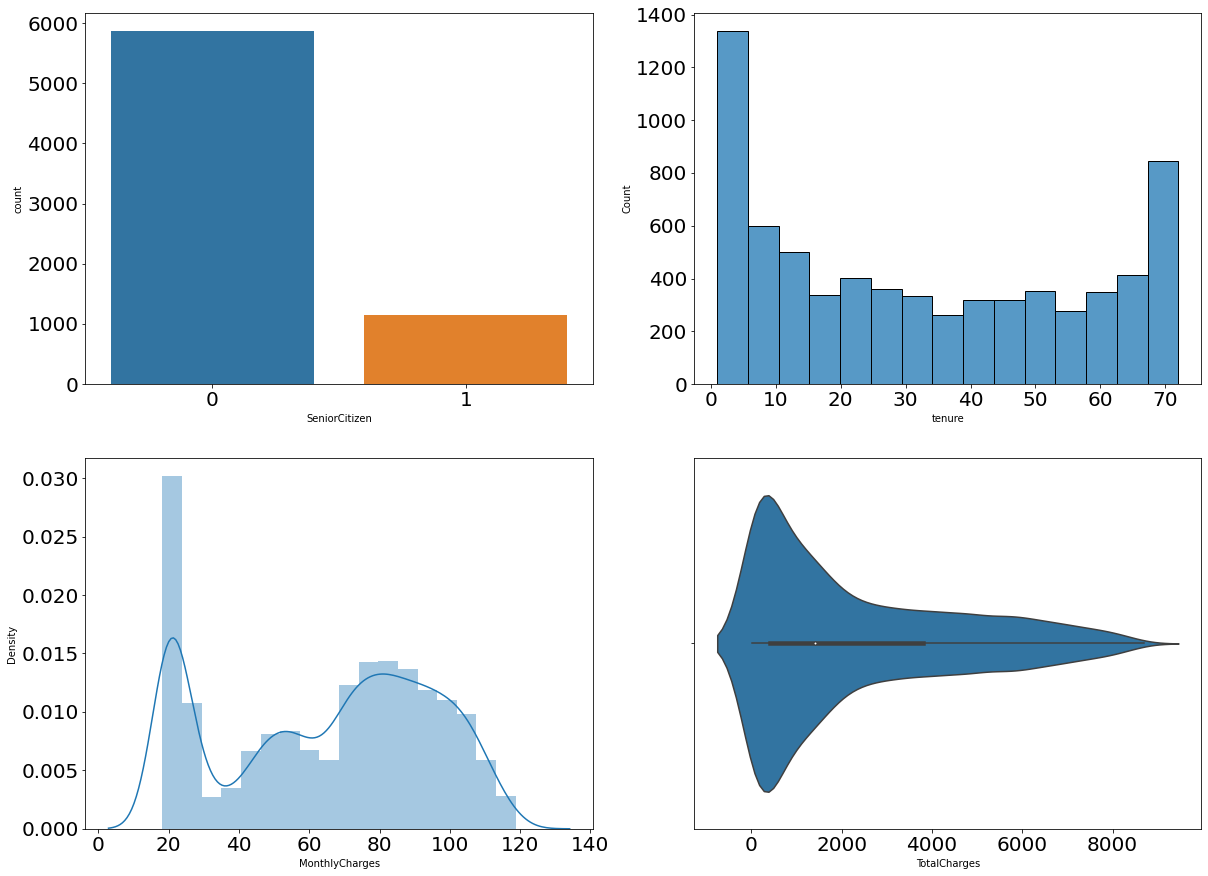

In [45]:
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.countplot(df["SeniorCitizen"],ax=axes[0][0])
sns.histplot(df["tenure"],ax=axes[0][1])
sns.distplot(df["MonthlyCharges"],ax=axes[1][0])
sns.violinplot(df["TotalCharges"],ax=axes[1][1])
plt.sca(axes[0][0])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.sca(axes[0][1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.sca(axes[1][0])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.sca(axes[1][1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show();

# Observation:
## From the above charts captured the below insights.
- Most the people are non-senior citizens
- Max people choose tenure period in between 0-5 
- Most of the people opt low chargeable service (i.e 20-30)

In [47]:
df.select_dtypes(include="object").columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [48]:
cat_columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

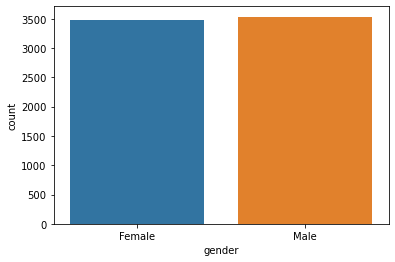

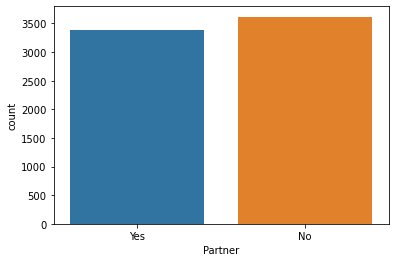

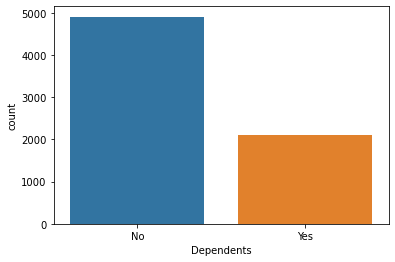

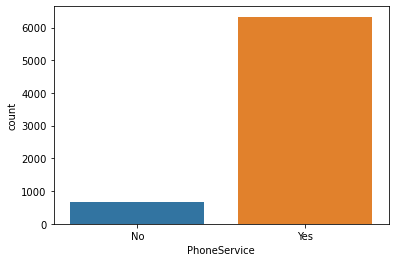

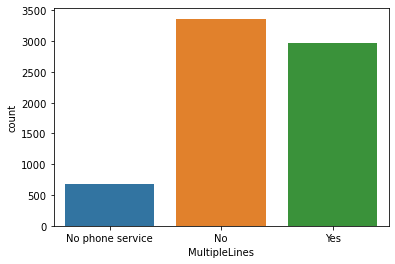

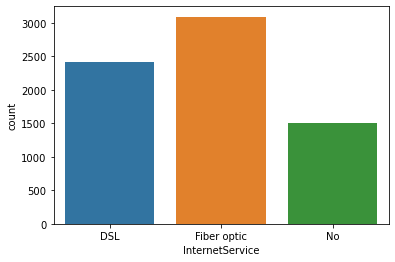

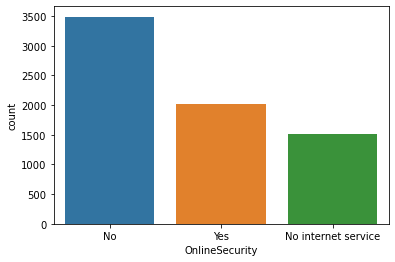

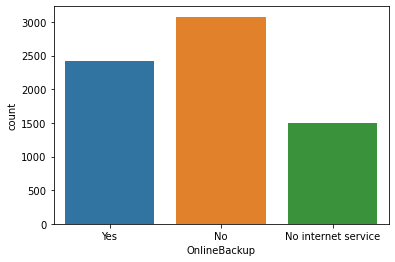

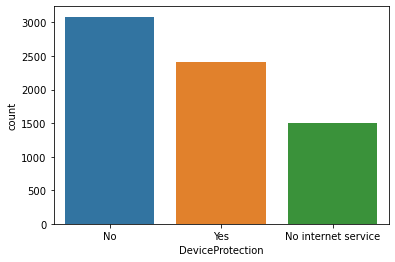

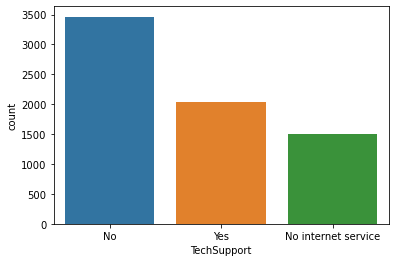

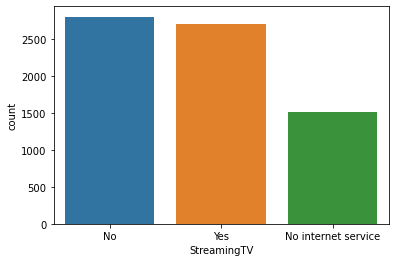

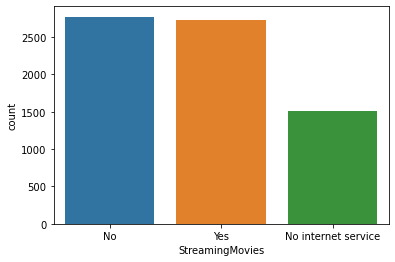

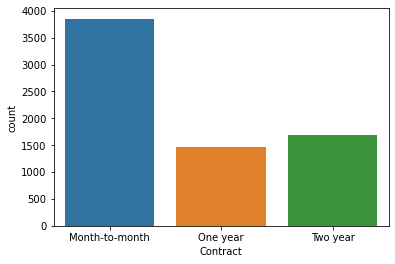

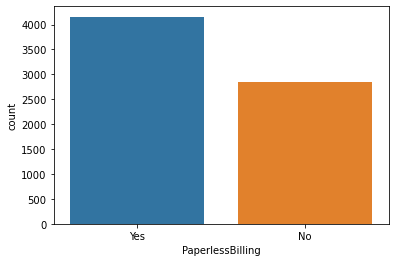

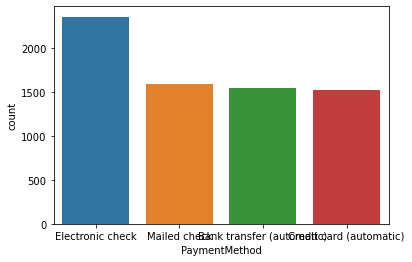

In [49]:
for i in cat_columns:
    sns.countplot(df[i])
    plt.show();

# Main insights from the above visuals
- Max People  opted  phone service
- Males and Females are in equal ratio
- Most of the users are using Electronic check payment Method
- Month-to-Month Plan is most preferable
- Max user does not have dependants

# Exploratory Data Analysis using Tableau

https://public.tableau.com/views/Analysistofindthevariableswhichaffectsthechurnmost/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link